In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("nyccleaned.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#df["PBD"] = df.apply(lambda x:x["trip_distance"] / x["total_amount"], axis = 1)
TDTM = df.groupby("PickupBorough")["trip_distance" , "total_amount"].mean()

print(TDTM)

               trip_distance  total_amount
PickupBorough                             
Bronx               5.081919     23.517741
Brooklyn            3.775676     23.917414
EWR                 2.630870     67.766522
Manhattan           2.408330     15.202988
Queens              8.747949     35.124970
Staten Island      16.969837     60.028211
Unknown             5.321172     20.611263


<ipython-input-3-6e6553b4cb5f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TDTM = df.groupby("PickupBorough")["trip_distance" , "total_amount"].mean()


PickupBorough
Bronx             4.627728
Brooklyn          6.334604
EWR              25.758222
Manhattan         6.312667
Queens            4.015224
Staten Island     3.537347
Unknown           3.873444
Name: PBD, dtype: float64


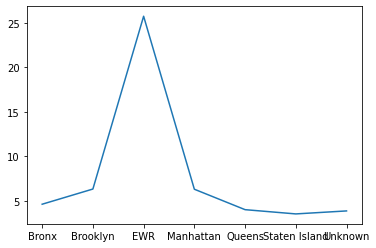

In [4]:
# amount per mile
TDTM["PBD"] = TDTM.apply(lambda x:x["total_amount"] / x["trip_distance"], axis = 1)
print(TDTM["PBD"])

plt.plot(TDTM["PBD"])
plt.show()

In [5]:
df = df[(df["PickupBorough"] != "Unknown")]
df = df[(df["PickupBorough"] != "EWR")]
df = df[(df["payment_type"] != 3)]
df = df[(df["payment_type"] != 4)]
df = df[(df["payment_type"] != 5)]
df = df[(df["payment_type"] != 6)]

In [13]:

Manhattan = df[(df["PickupBorough"] == "Manhattan") & (df["DropoffBorough"] == "Manhattan")]
Bronx=df[(df["PickupBorough"]=="Bronx")&(df["DropoffBorough"]=="Bronx")]
Queens=df[(df["PickupBorough"]=="Queens")&(df["DropoffBorough"]=="Queens")]
Brooklyn=df[(df["PickupBorough"]=="Brooklyn")&(df["DropoffBorough"]=="Brooklyn")]
Staten_Island=df[(df["PickupBorough"]=="Staten Island")&(df["DropoffBorough"]=="Staten Island")]


In [12]:
# Manhattan Data
Mcash = Manhattan[(Manhattan["payment_type"] == 2)]
# count cash payment for Manhattan
CS = Mcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
# count total payment for Manhattan
tt = Manhattan.groupby(["PickupZone"])["trip_distance"].count()
# % of payment use by cash
pct = CS / tt
top = pct.sort_values(ascending=False)
print("Manhattan:")
print(top)

Manhattan:
payment_type  PickupZone                   
2             East Harlem North                0.606004
              Central Harlem North             0.605387
              Highbridge Park                  0.600000
              Manhattanville                   0.574264
              Hamilton Heights                 0.569968
                                                 ...   
              Meatpacking/West Village West    0.273063
              Financial District North         0.261047
              Randalls Island                  0.257143
              Battery Park City                0.235627
              Inwood Hill Park                 0.200000
Name: trip_distance, Length: 66, dtype: float64


In [11]:
# same for bronx
Bxcash = Bronx[(Bronx["payment_type"] == 2)]
BCS = Bxcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
btt = Bronx.groupby(["PickupZone"])["trip_distance"].count()
bxpct = BCS / btt
BXtop = bxpct.sort_values(ascending=False)
print("Bronx:")
print(BXtop)

Bronx:
payment_type  PickupZone                         
2             Fordham South                          0.807018
              Mott Haven/Port Morris                 0.712150
              Bronx Park                             0.700000
              Melrose South                          0.692308
              West Concourse                         0.680251
              Bedford Park                           0.676768
              Highbridge                             0.655629
              East Concourse/Concourse Village       0.621875
              Morrisania/Melrose                     0.616766
              Mount Hope                             0.608696
              Belmont                                0.600000
              Van Cortlandt Village                  0.596491
              Williamsbridge/Olinville               0.590361
              Pelham Bay Park                        0.578947
              East Tremont                           0.575472
             

In [10]:
# same for queens
Qcash = Queens[(Queens["payment_type"] == 2)]
QCS = Qcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
qtt = Queens.groupby(["PickupZone"])["trip_distance"].count()
qpct = QCS / qtt
Qtop = qpct.sort_values(ascending=False)
print("Queens:")
print(Qtop)

Queens:
payment_type  PickupZone                      
2             Forest Park/Highland Park           1.000000
              Saint Michaels Cemetery/Woodside    0.941176
              Long Island City/Hunters Point      0.896220
              Woodside                            0.803235
              Astoria Park                        0.750000
                                                    ...   
              Ridgewood                           0.121951
              Hammels/Arverne                     0.106061
              Bay Terrace/Fort Totten             0.090909
              Auburndale                          0.090909
              Glendale                            0.066667
Name: trip_distance, Length: 64, dtype: float64


In [9]:
Bkcash = Brooklyn[(Brooklyn["payment_type"] == 2)]
BKCS = Bkcash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
bktt = Brooklyn.groupby(["PickupZone"])["trip_distance"].count()
bkpct = BKCS / bktt
BKtop = bkpct.sort_values(ascending=False)
print("Brooklyn:")
print(BKtop)

Brooklyn:
payment_type  PickupZone                       
2             Marine Park/Floyd Bennett Field      0.666667
              Brighton Beach                       0.650000
              Manhattan Beach                      0.592593
              Carroll Gardens                      0.588889
              Williamsburg (South Side)            0.568000
              Fort Greene                          0.538647
              Greenpoint                           0.523256
              Bushwick South                       0.506383
              Ocean Parkway South                  0.500000
              Clinton Hill                         0.495327
              South Williamsburg                   0.492754
              East Williamsburg                    0.491379
              Bedford                              0.491289
              Boerum Hill                          0.485660
              Prospect-Lefferts Gardens            0.443503
              Brooklyn Heights            

In [7]:

Scash = Staten_Island[(Staten_Island["payment_type"] == 2)]
SCS = Scash.groupby(["payment_type", "PickupZone"])["trip_distance"].count()
stt = Staten_Island.groupby(["PickupZone"])["trip_distance"].count()
spct = SCS / stt
Stop = spct.sort_values(ascending=False)
print("Staten_Island")
print(Stop)


Staten_Island
payment_type  PickupZone                 
2             West Brighton                  1.000000
              Stapleton                      1.000000
              South Beach/Dongan Hills       1.000000
              Oakwood                        1.000000
              Heartland Village/Todt Hill    1.000000
              Great Kills                    1.000000
              Westerleigh                    0.800000
              Arrochar/Fort Wadsworth        0.500000
              Charleston/Tottenville         0.470588
              New Dorp/Midland Beach         0.375000
              Bloomfield/Emerson Hill        0.357143
              Grymes Hill/Clifton            0.285714
              Mariners Harbor                0.200000
Name: trip_distance, dtype: float64
